## Standardization

To analyze distributed data in one scale

In [1]:
from sklearn.preprocessing import StandardScaler
data = [[0,0], [0,0],[1,1],[1,1]]
scaler = StandardScaler()
print(scaler.fit(data))


StandardScaler()


In [2]:
print(scaler.transform(data))

[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]


In [3]:
print(scaler.transform([[2,2]]))

[[3. 3.]]


## Normalization

In [4]:
from sklearn.preprocessing import normalize
X = [[2,1,2],[-1,0,1]]
normalize(X, norm="l1")

array([[ 0.4,  0.2,  0.4],
       [-0.5,  0. ,  0.5]])

In [5]:
normalize(X, norm="l2")

array([[ 0.66666667,  0.33333333,  0.66666667],
       [-0.70710678,  0.        ,  0.70710678]])

## MinMaxScale

In [6]:
from sklearn.preprocessing import minmax_scale
X = [[-2,1,2],[-1,0,1]]
minmax_scale(X, axis=0)


array([[0., 1., 1.],
       [1., 0., 0.]])

In [7]:
minmax_scale(X, axis=1)

array([[0.  , 0.75, 1.  ],
       [0.  , 0.5 , 1.  ]])

## Kmeans

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\uSER\AppData\Local\Temp\ipykernel_9956\328324305.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [9]:
data = pd.read_csv(r"C:\Users\uSER\Downloads\Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
X= data.iloc[:, [3,4]].values
y = data.iloc[:,3].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1))

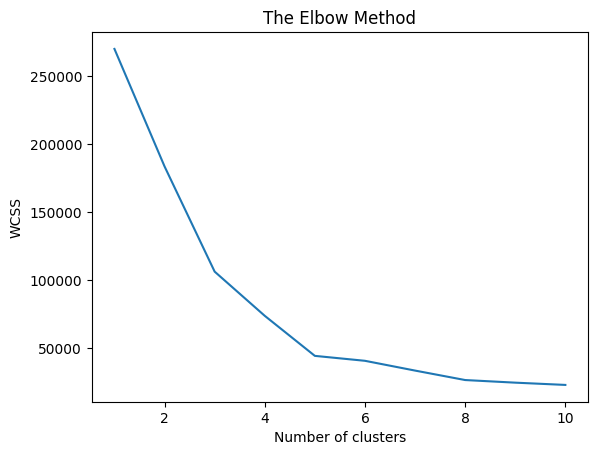

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel('WCSS')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


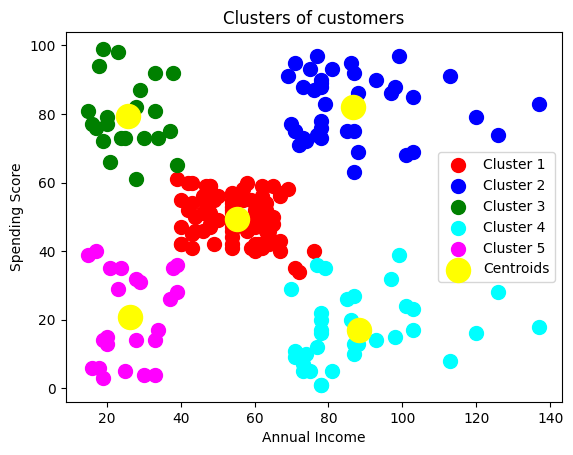

In [15]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s=100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s=100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title("Clusters of customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

In [16]:
data = pd.read_csv(r"C:\Users\uSER\Downloads\Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [17]:
X= data.iloc[:, [3,4]].values
y = data.iloc[:,3].values

In [18]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1))

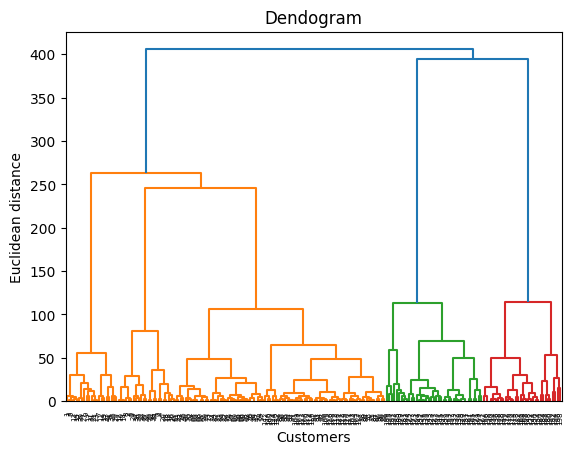

In [19]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.plot(range(1,11), wcss)
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel('Euclidean distance')
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

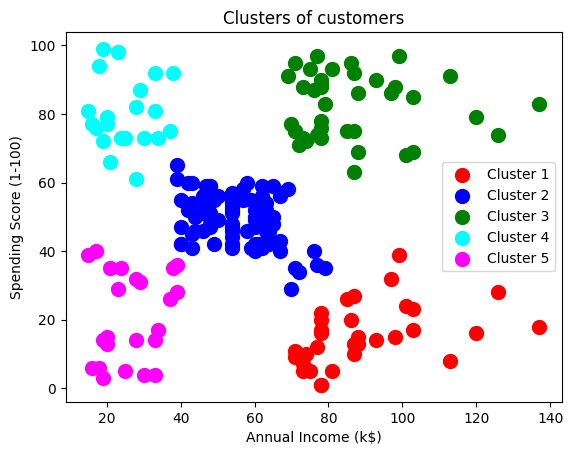

In [21]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Dynamic Programming

Problem Statement:

Given a bag with capacity W and a list of items along with their weights and profit associated with them. The tast is to fill the bag efficiently such that max profit is achieved

In [ ]:
W = 11
wt=[1,2,5,6,7]
pr=[1,6,18,22,28]
def profit():
    for i in range(0,len(wt)-1):
        if (wt[i]+wt[i+1])


wt=[1,2,5,6,7]
pr=[1,6,18,22,28]
for i in range(0,len(wt)-1):
    if(wt[i]+wt[i+1])<=11:
        


In [88]:
#Write a program to move all the zeros at end of string while maintaing correct order of elements in the array
List=[0,1,0,2,3,0]
List1=[]
for i in range(len(List)):
    if List[i]==0:
        List1.append(List[i])
fList=[]
for x in range(len(List)):
    if List[x]!=0:
        fList.append(List[x])
    result = fList+List1
print(result)

[1, 2, 3, 0, 0, 0]


In [99]:
# Write a program to replace all vowels with capital letter
str="machine"
str1=''
for i in range(len(str)):
    if str[i]=='a' or str[i]=='e' or str[i]=='i' or str[i]=='o' or str[i]=='u':
        a=ord(str[i])
        str1=str1+chr(a-32)
    else:
        str1=str1+str[i]
print(str1)

mAchInE


In [136]:
#Write a program to find maximum of summation from sublist in contigious fashion

List=[5,10,15,16,17]
n = int(input("Enter length of substring:"))
max=0

for i in range(len(List)-(n-1)):
    sum=0
    for j in range(i,i+n):
        sum+=List[j]
        if sum>max:
            max=sum
        
print("Summation=",max)

Enter length of substring: 4


Summation= 58
